<div style="text-align: center;">
  <br/>
    <a target="_blank" href="https://deidentify.online"><img alt="De-Identify" src="https://stabrise.com/media/filer_public_thumbnails/filer_public/b1/54/b154d991-70d7-4c4e-9e62-622a174660a0/deidentify.png__1000x300_subsampling-2.webp" width="500" style="max-width: 100%;"></a>
  <br/>
</div>


<div style="text-align: center;">
    <a target="_blank" href="https://colab.research.google.com/github/StabRise/de-identify/blob/master/image/ImageDeIdentification.ipynb">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
    <a href="https://github.com/stabrise/de-identify/" alt="GitHub"><img src="https://img.shields.io/static/v1?label=GitHub&message=De-Identify&color=blue&logo=github" /></a>
    <a href="https://pypi.org/project/scaledp/" alt="Package on PyPI"><img src="https://img.shields.io/pypi/v/scaledp.svg" /></a>    
    <a href="https://stabrise.com"><img alt="StabRise" src="https://img.shields.io/badge/by-StabRise-orange.svg?style=flat&colorA=E1523D&colorB=007D8A"></a>
</div>

# Image De-Identification

In [ ]:
%pip install -U scaledp-pro[inference]

## Start a Spark Session with ScaledDP

In [1]:
from scaledp import *
from scaledp_pro import *
spark = ScaleDPSession(with_pro=True)
spark

25/01/03 04:22:45 WARN Utils: Your hostname, nmelnik-1-0 resolves to a loopback address: 127.0.1.1; using 192.168.1.117 instead (on interface wlo1)
25/01/03 04:22:45 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/01/03 04:22:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Load example image file

Image#:,0
Path:,Invoice.png
Size:,1414 x 2000 px
Resolution:,0 dpi

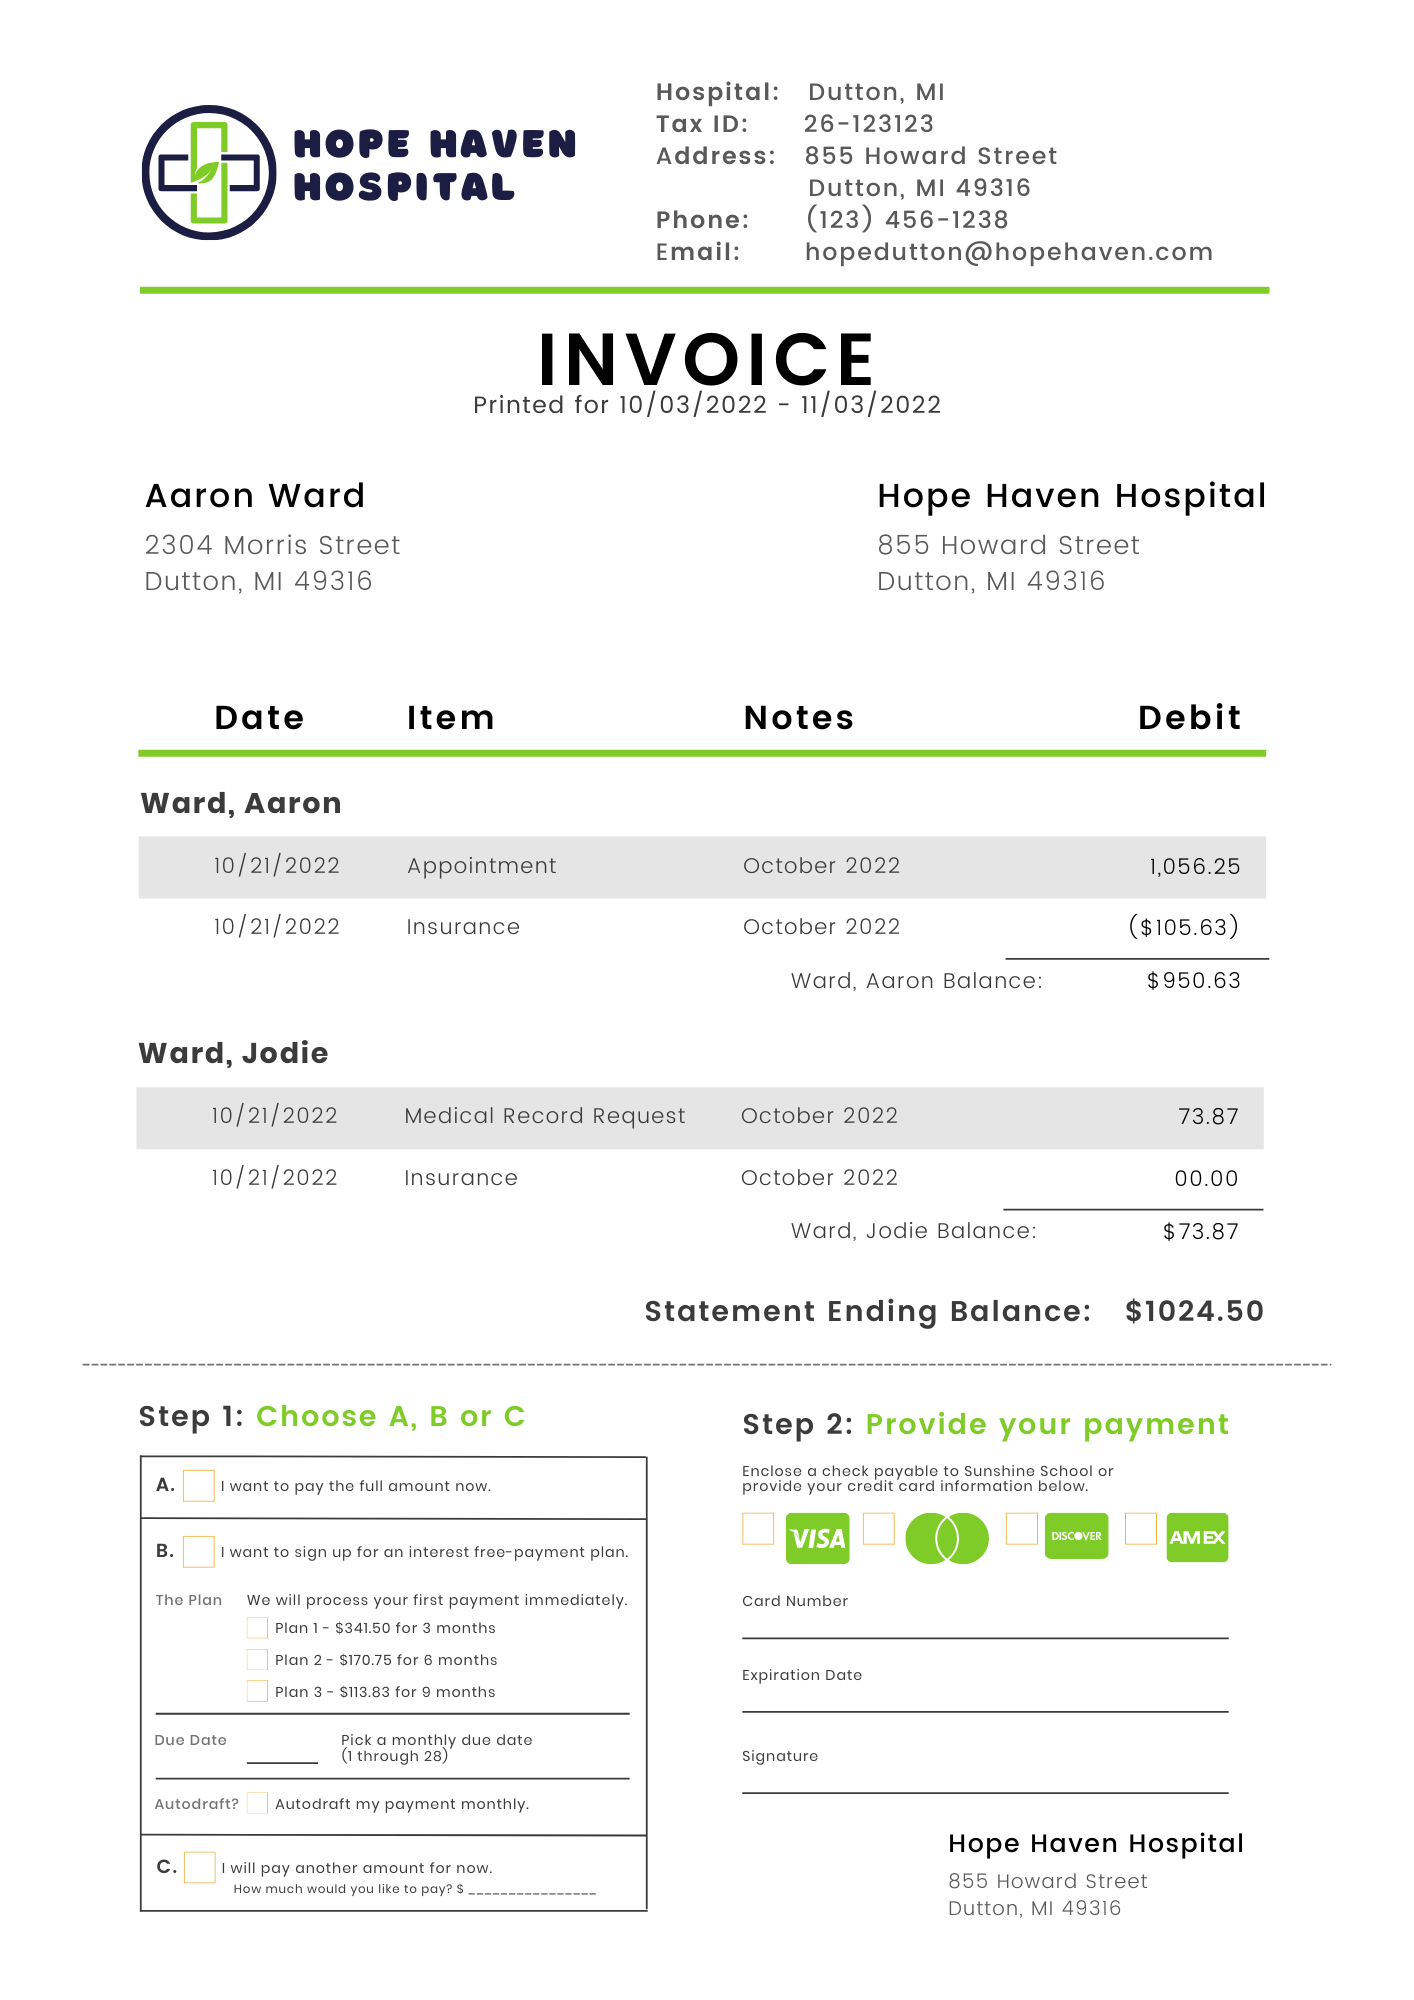

In [2]:
image_example = files('resources/images/Invoice.png')
df = spark.read.format("binaryFile") \
    .load(image_example)

df.show_image("content")

## Define the pipeline

In [3]:
pipeline = PipelineModel(stages=[
    DataToImage(),
    TesseractOcr(keepInputData=True),
    NerOnnx(model="StabRise/deid-bert-onnx-0.1.0"),
    ImageDeIdentifier(whiteList=["DATE"])
])

## Run the pipeline

2025-01-03 06:23:12.400160 INFO: Run NER                            (0 + 1) / 1]
2025-01-03 06:23:16.335599 INFO: Start processing NER               (0 + 1) / 1]
2025-01-03 06:23:16.433270 INFO: End NER


Image#:,0
Path:,Invoice.png
Size:,1414 x 2000 px
Resolution:,0 dpi

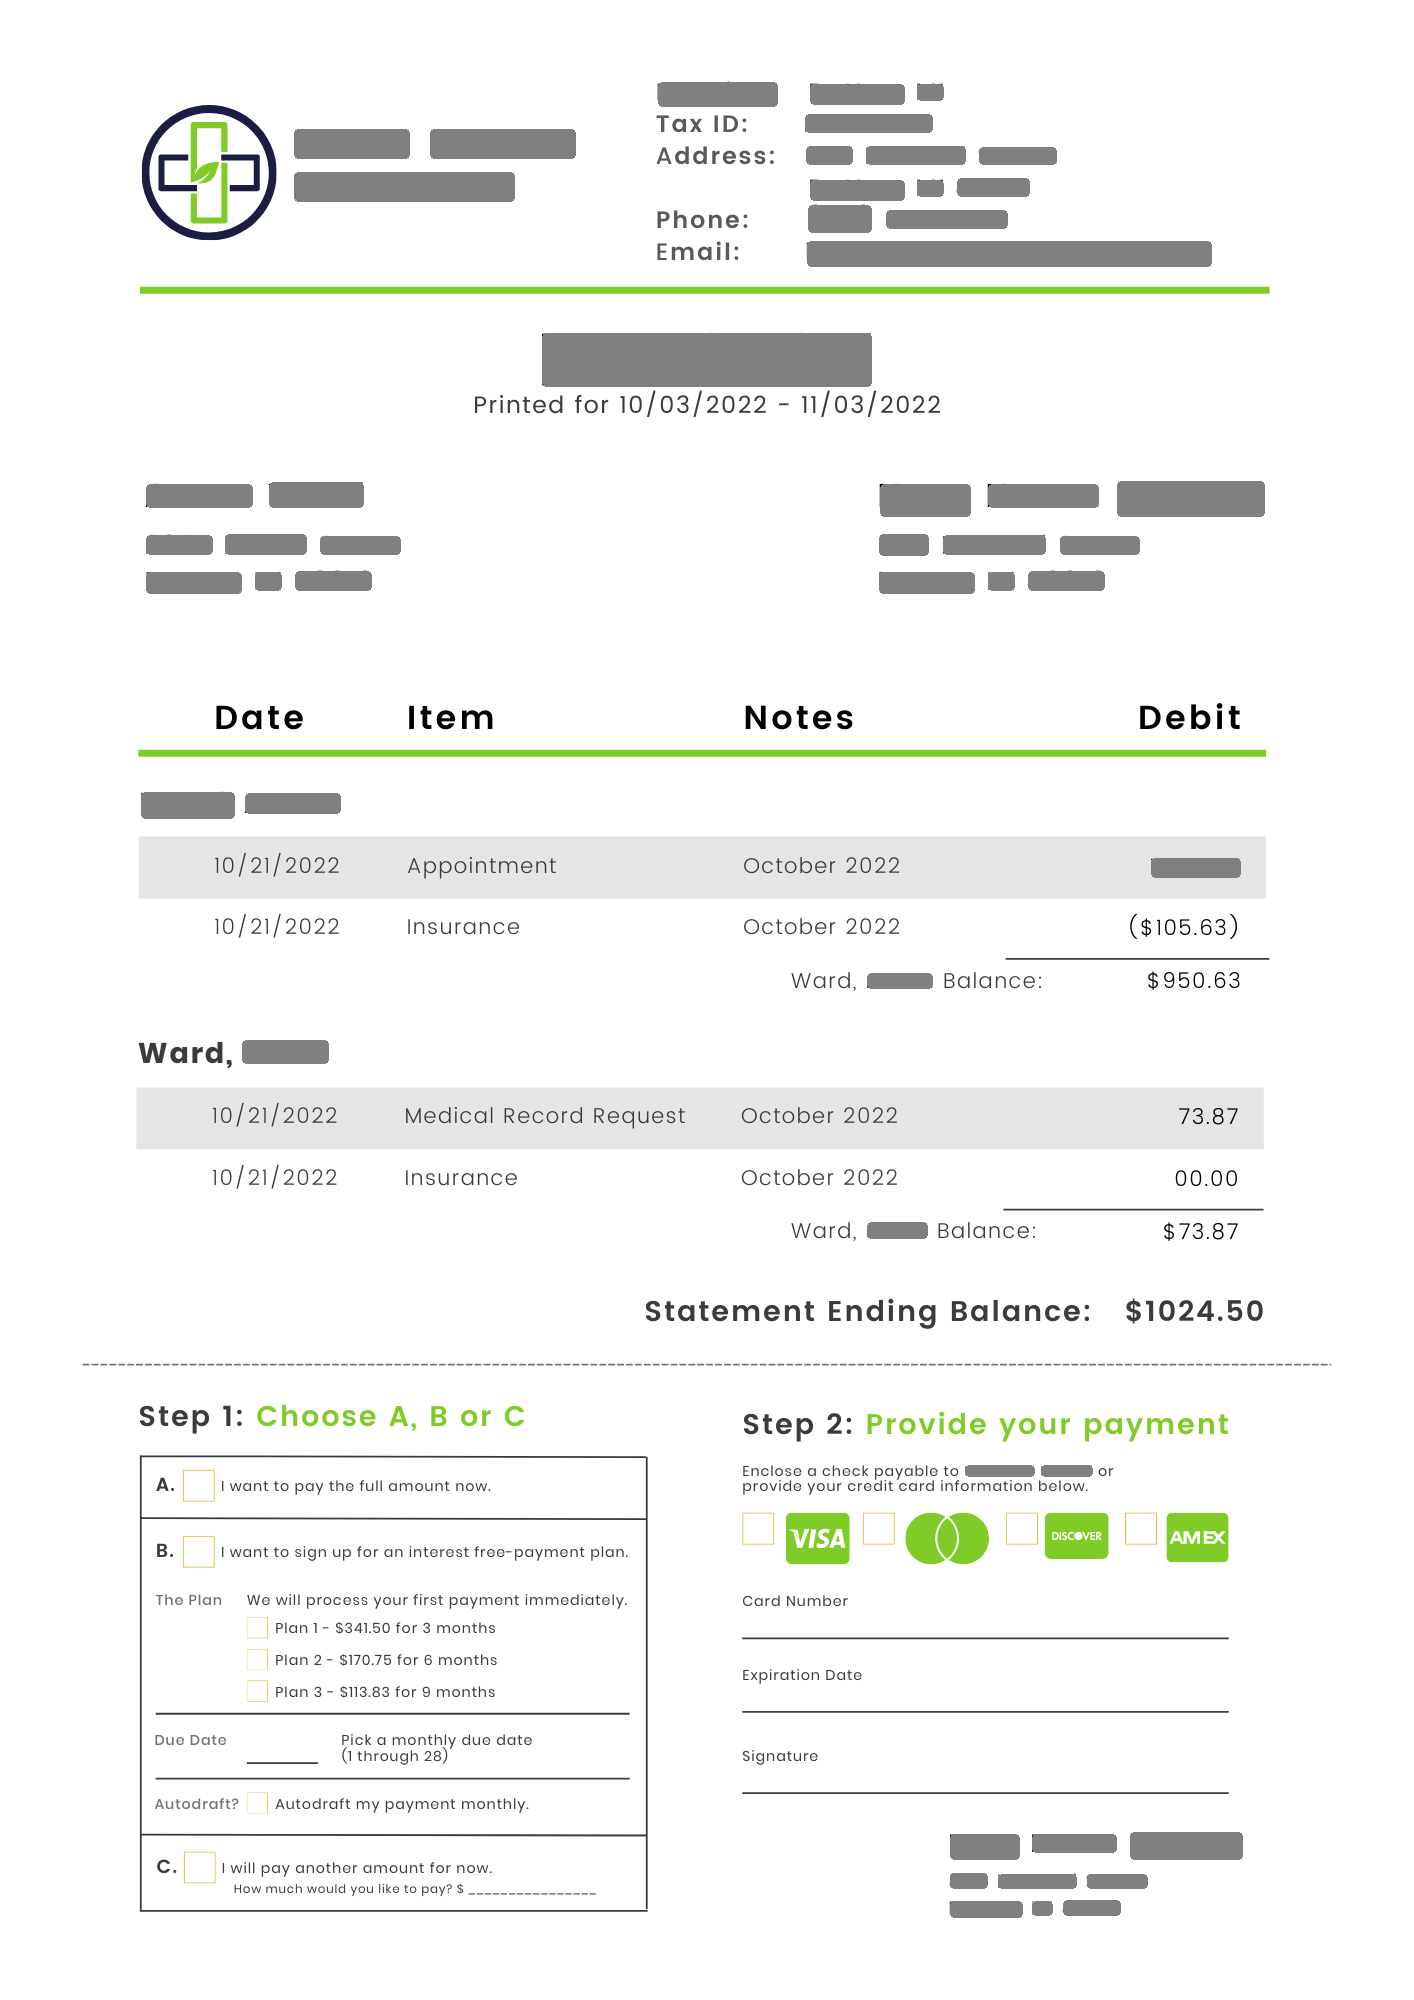

In [5]:
result = pipeline.transform(df).cache()
result.show_image("deidentified_image")

## Show the available NER tags

In [7]:
pipeline.stages[2].getLabels()

{'AGE',
 'DATE',
 'EMAIL',
 'HOSP',
 'ID',
 'LOC',
 'O',
 'OTHERPHI',
 'PATIENT',
 'PATORG',
 'PHONE',
 'STAFF'}

## Show the NER results

In [6]:
result.show_ner()

+------------+-------------------+----------+-----+---+--------------------+
|entity_group|              score|      word|start|end|               boxes|
+------------+-------------------+----------+-----+---+--------------------+
|        HOSP|  0.991257905960083|  Hospital|    0|  8|[{Hospital:, 0.94...|
|         LOC|  0.999171257019043|    Dutton|   10| 16|[{Dutton,, 0.9609...|
|         LOC| 0.9992585778236389|        MI|   18| 20|[{MI, 0.93335297,...|
|          ID| 0.6838774681091309|        26|   29| 31|[{26-123123, 0.90...|
|       PHONE| 0.4669828414916992|         -|   31| 32|[{26-123123, 0.90...|
|       PHONE| 0.7790692448616028|    123123|   32| 38|[{26-123123, 0.90...|
|        HOSP|0.37445756793022156|      HOPE|   39| 43|[{HOPE, 0.9525460...|
|        HOSP| 0.9503222703933716|     HAVEN|   44| 49|[{HAVEN, 0.952546...|
|         LOC| 0.9975488185882568|855 Howard|   59| 69|[{855, 0.94682700...|
|         LOC| 0.9984399676322937|    Street|   70| 76|[{Street, 0.95823...|